In [5]:
#cargo las librerias que necesito
rm( list=ls())
gc()

library("data.table")   #cargo la libreria  data.table
library("rpart")  #cargo la libreria  rpart
library("rpart.plot")
library("caret")
library( "ggplot2")
library( "lattice")
library('ggplot2')

options(repr.plot.width=20, repr.plot.height=10) 

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2276359,121.6,4505327,240.7,2856175,152.6
Vcells,3783452,28.9,68525693,522.9,71265650,543.8


In [6]:
#Aqui se debe poner la carpeta de la materia de SU computadora local
setwd("C:\\Users\\jesia\\Desktop\\4_DMEyF\\")  #Establezco el Working Directory

## Análisis de datos básico

In [173]:
dataset <- fread("./datasets/competencia1_2022.csv")   #cargo el dataset #cargo el dataset
dataset <- dataset[ foto_mes==202101 ]  # me quedo solo con el periodo 202101

Warning message:
"Removed 7824 rows containing missing values (geom_point)."
Warning message:
"Removed 229 rows containing missing values (geom_point)."


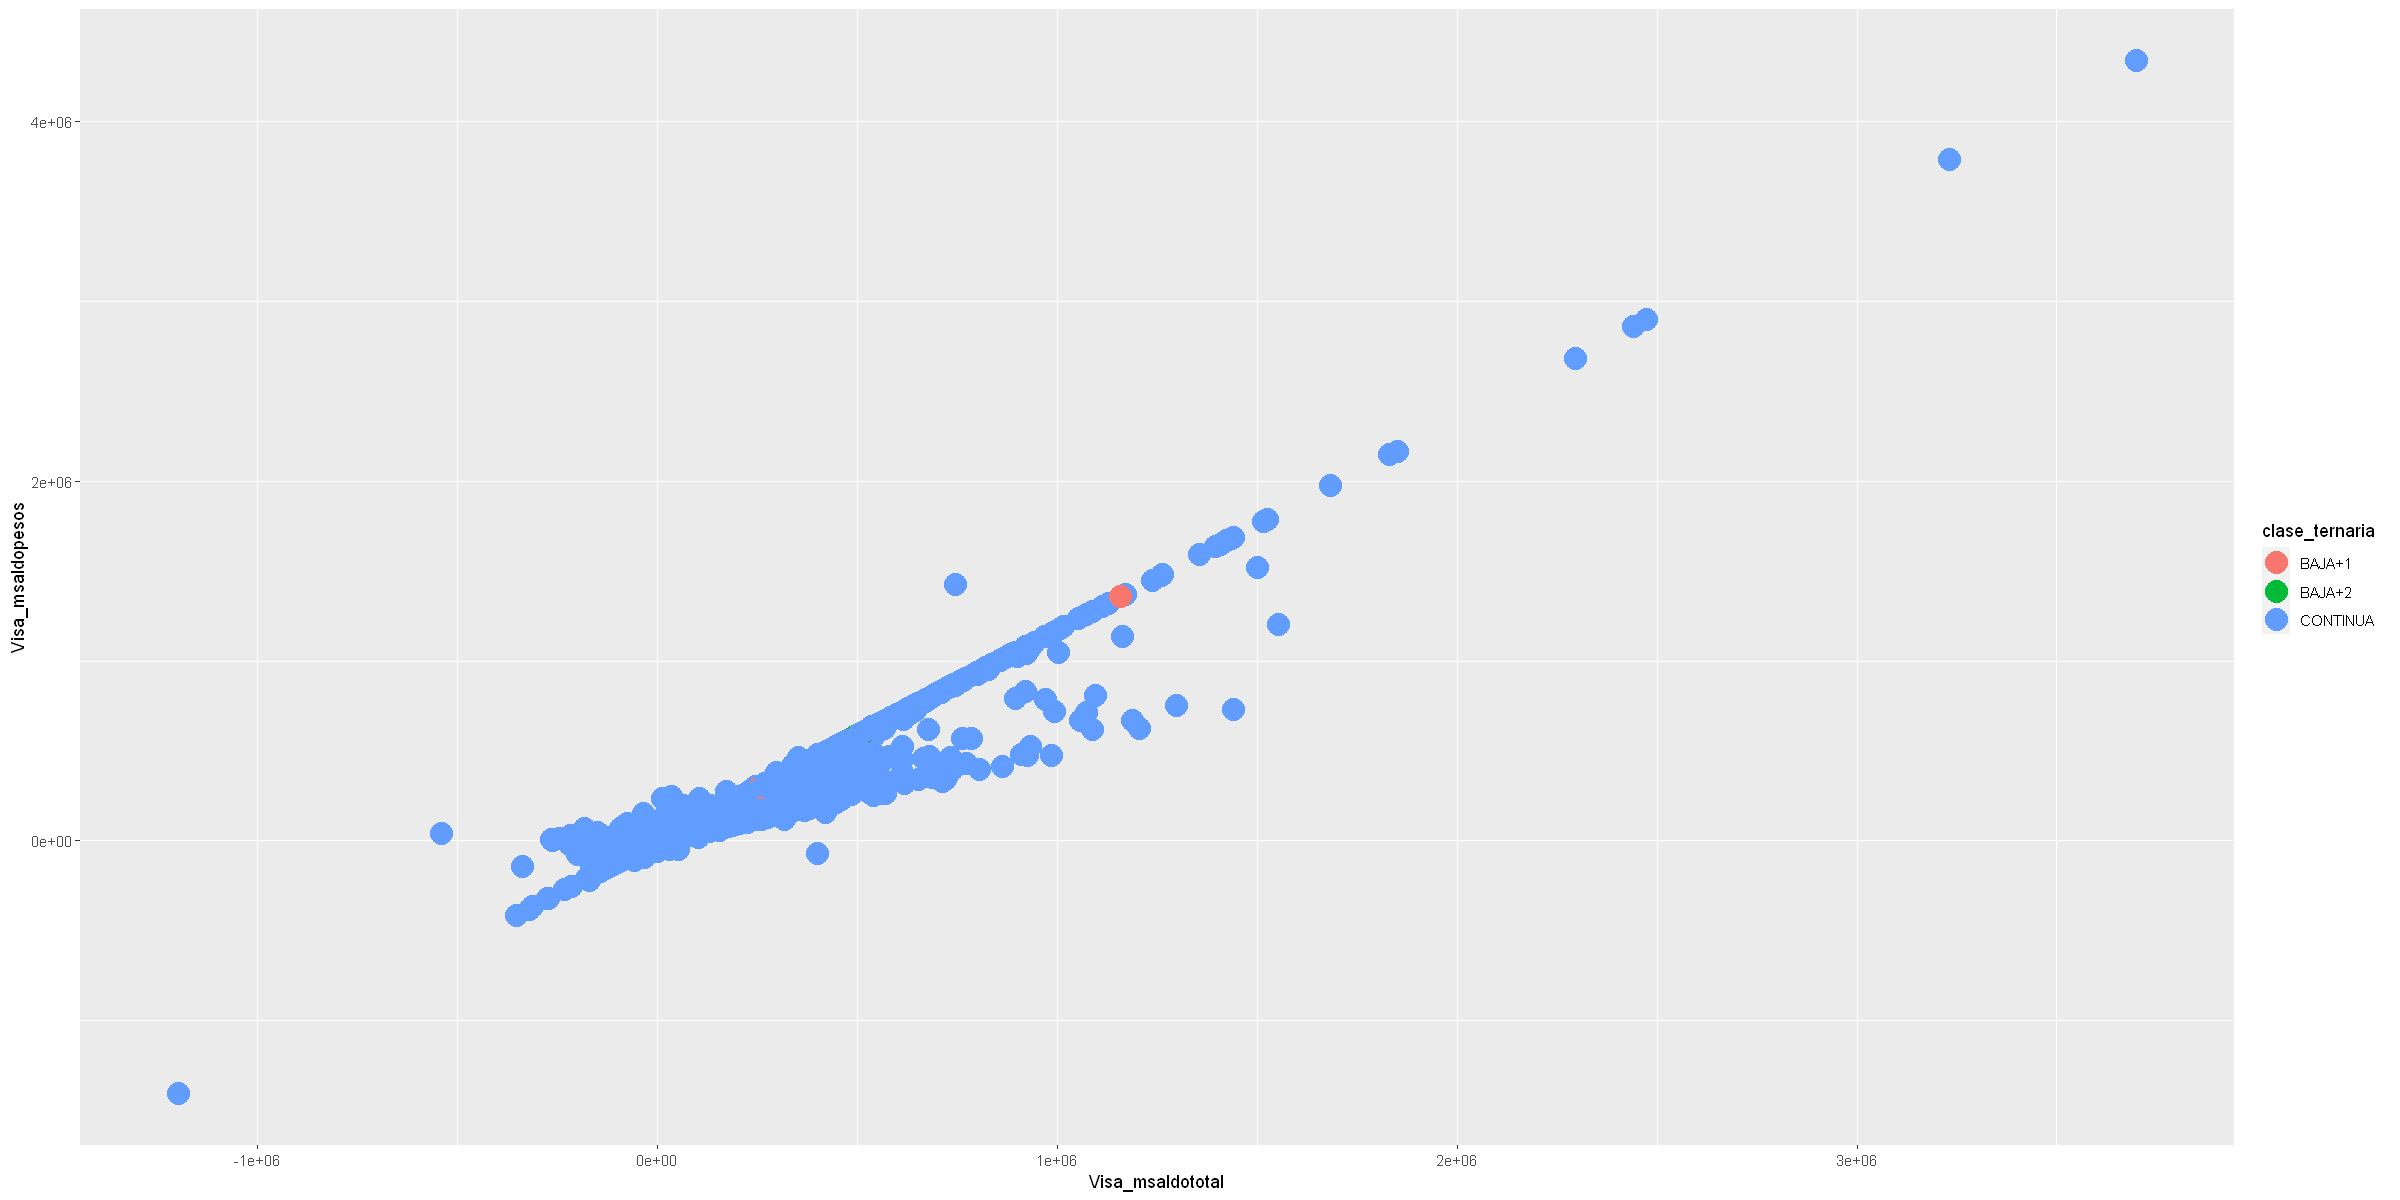

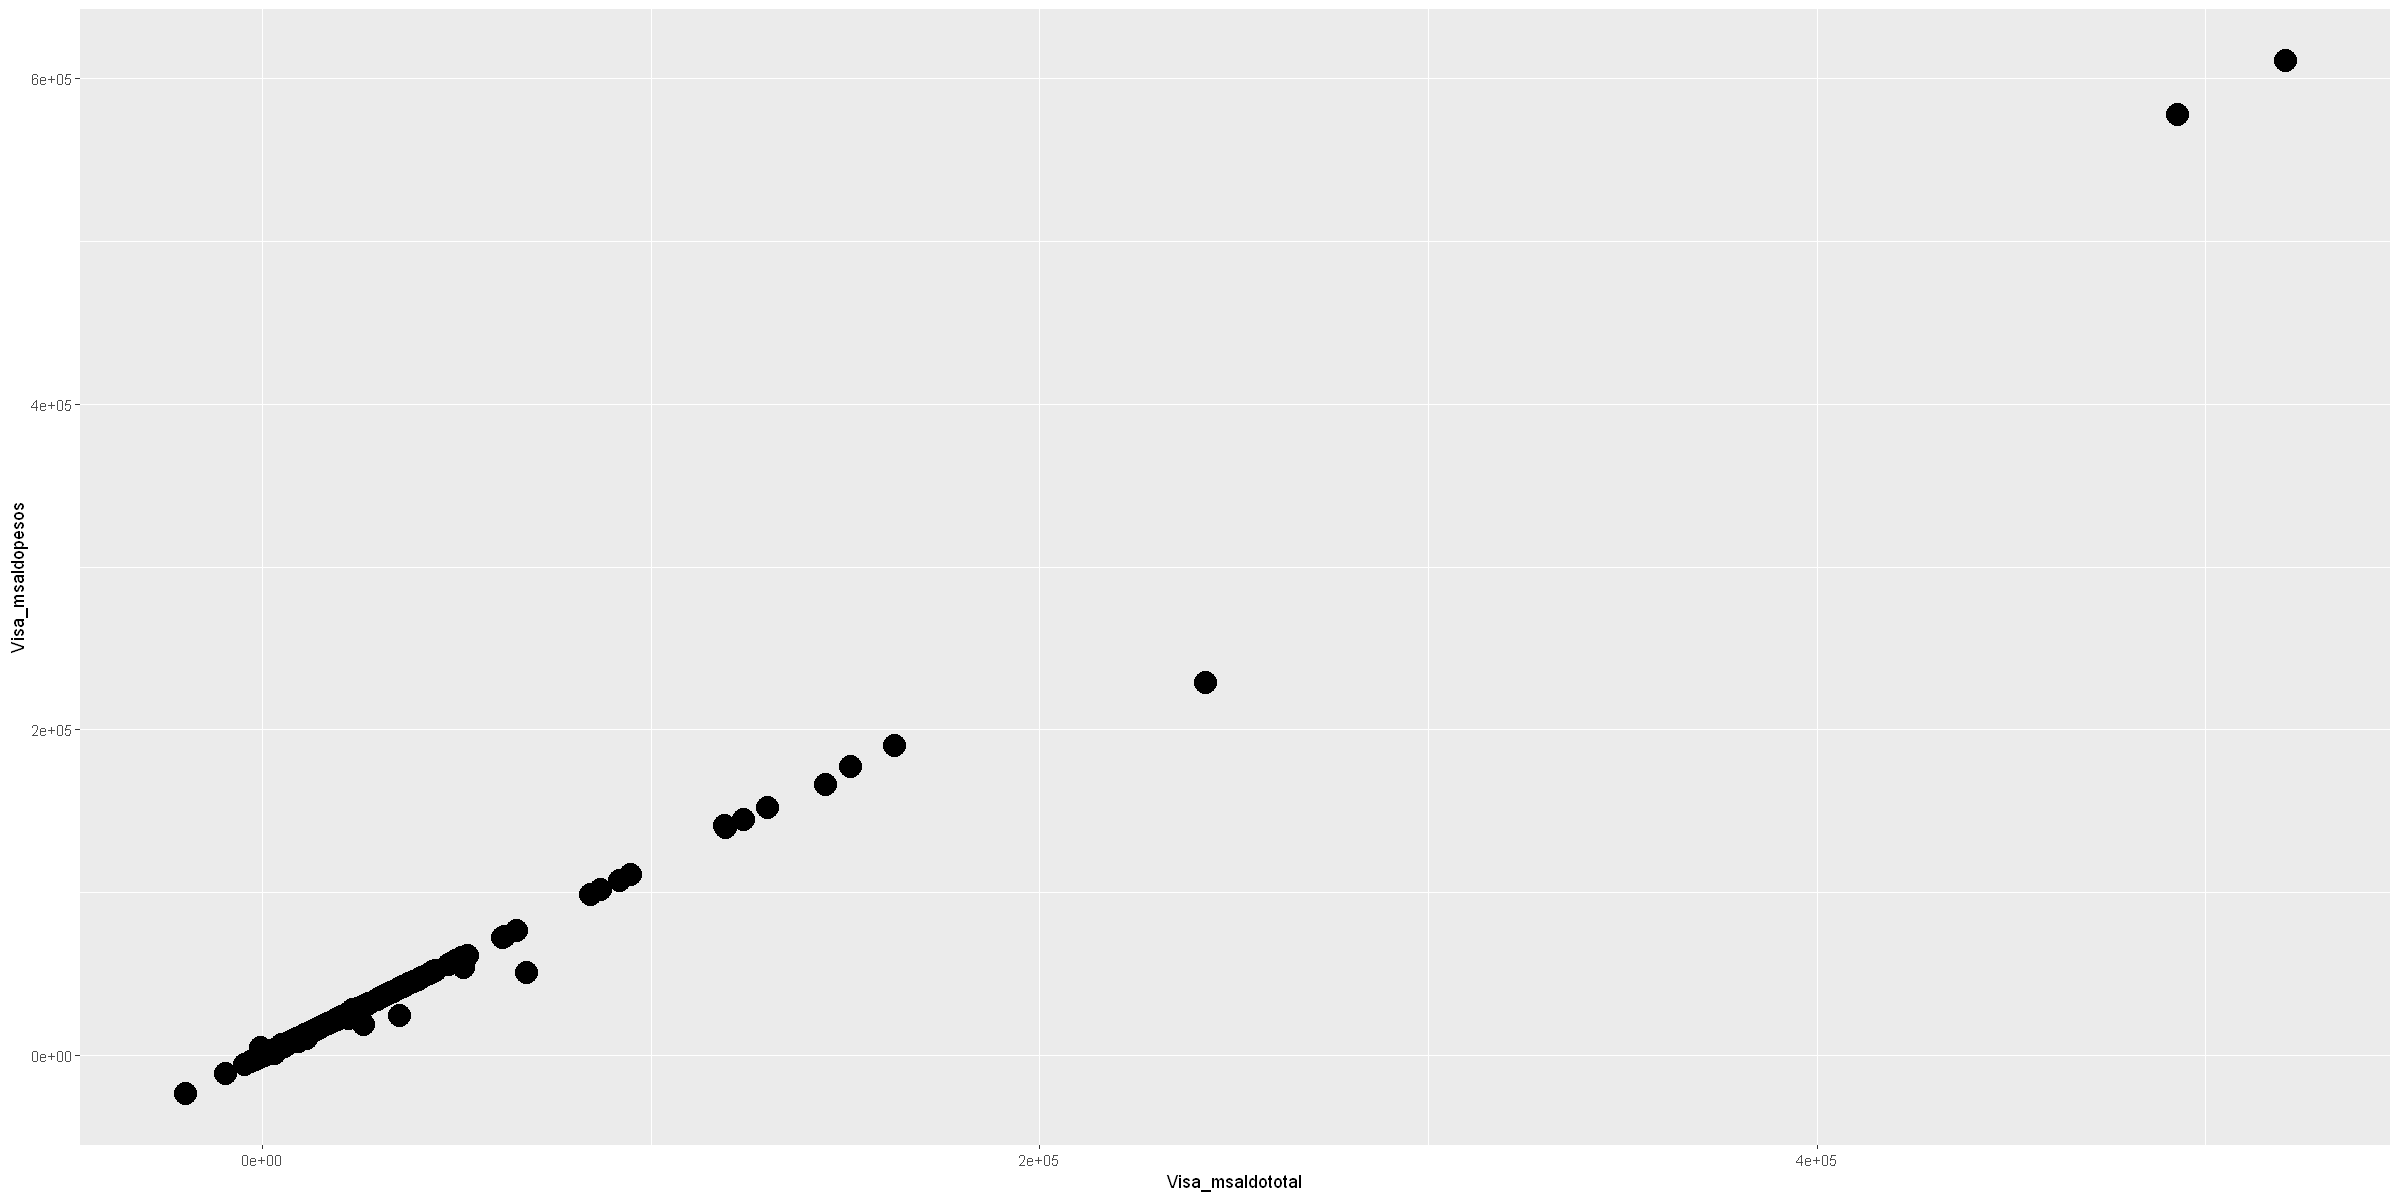

In [174]:
ggplot(dataset, aes(x=Visa_msaldototal, y=Visa_msaldopesos, color=clase_ternaria)) + 
    geom_point(size=6) 
df_baja2 <- dataset[ clase_ternaria=='BAJA+2' ]
ggplot(df_baja2, aes(x=Visa_msaldototal, y=Visa_msaldopesos)) + 
    geom_point(size=6) 

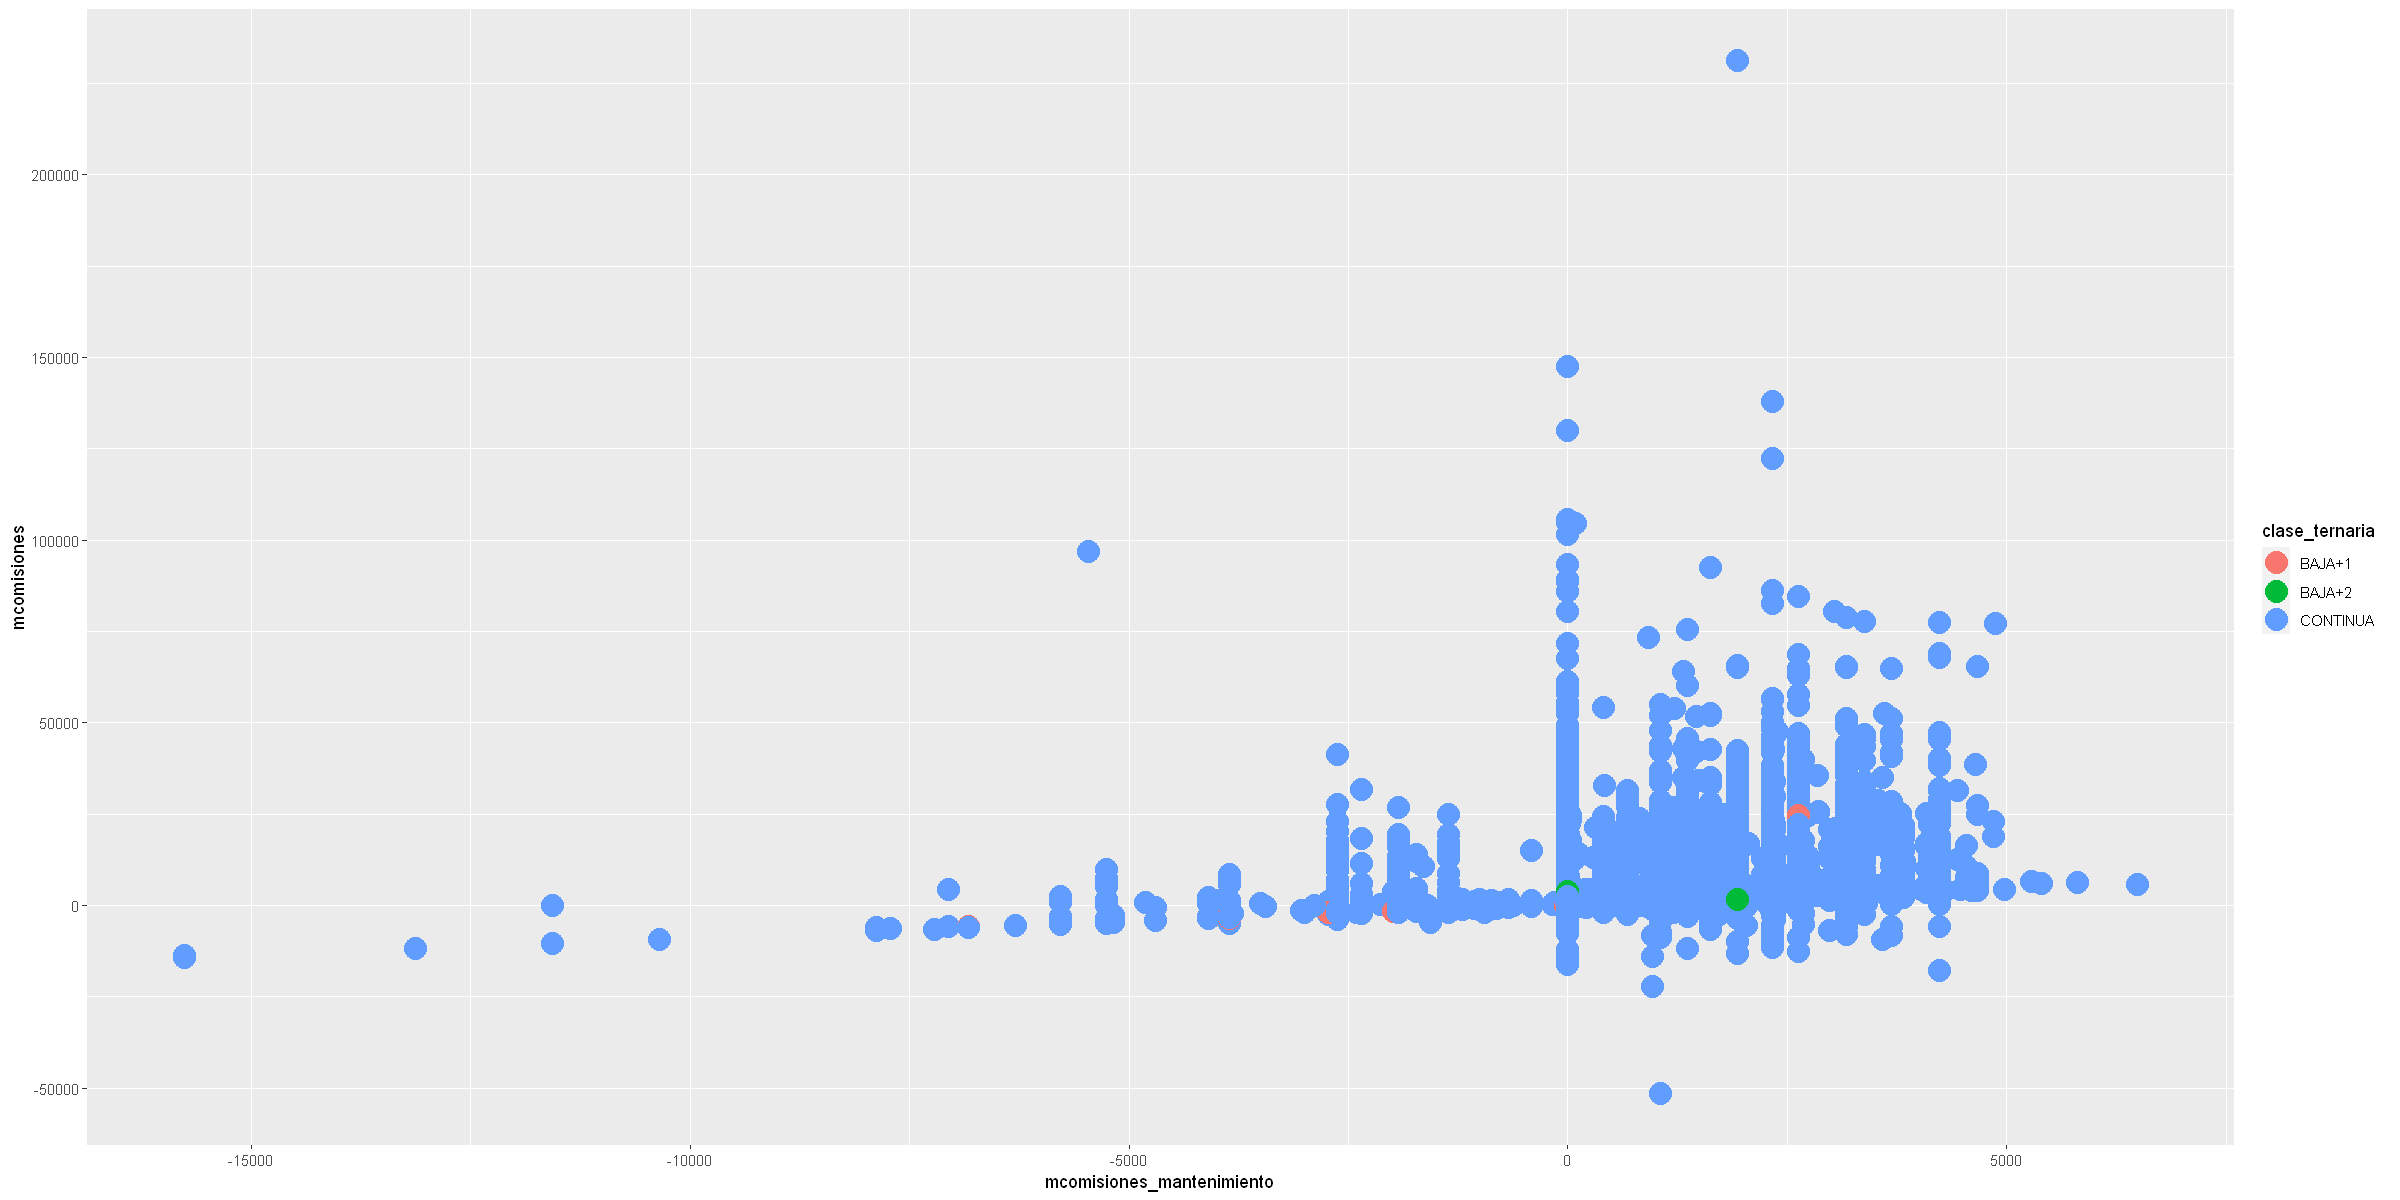

In [93]:
ggplot(dataset, aes(x=mcomisiones_mantenimiento, y=mcomisiones, color=clase_ternaria)) + 
    geom_point(size=6) 

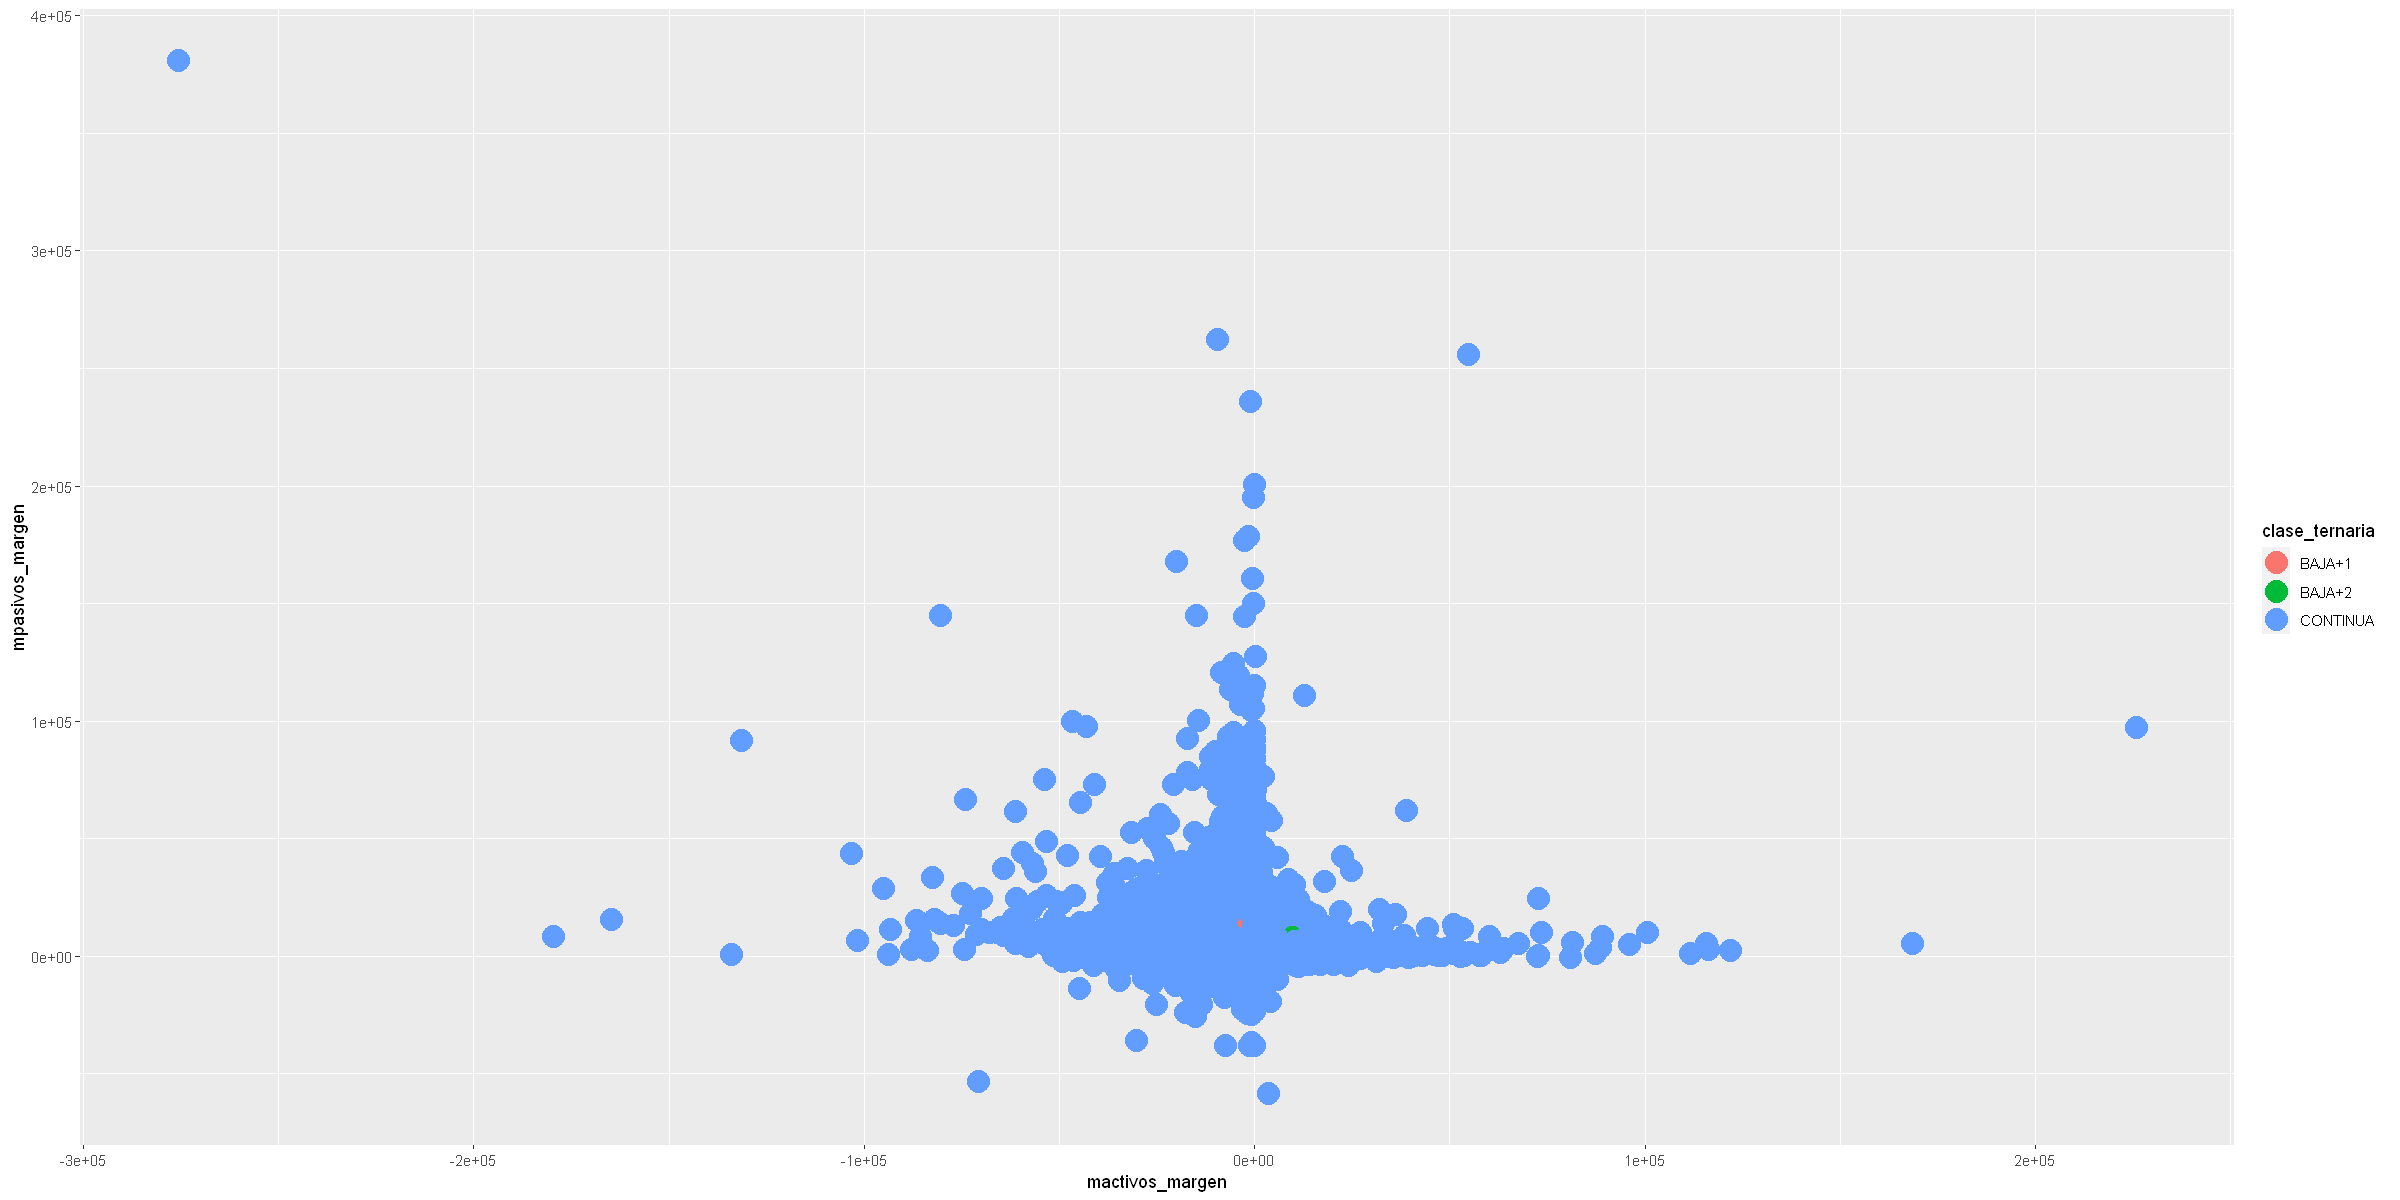

In [94]:
ggplot(dataset, aes(x=mactivos_margen, y=mpasivos_margen, color=clase_ternaria)) + 
    geom_point(size=6) 

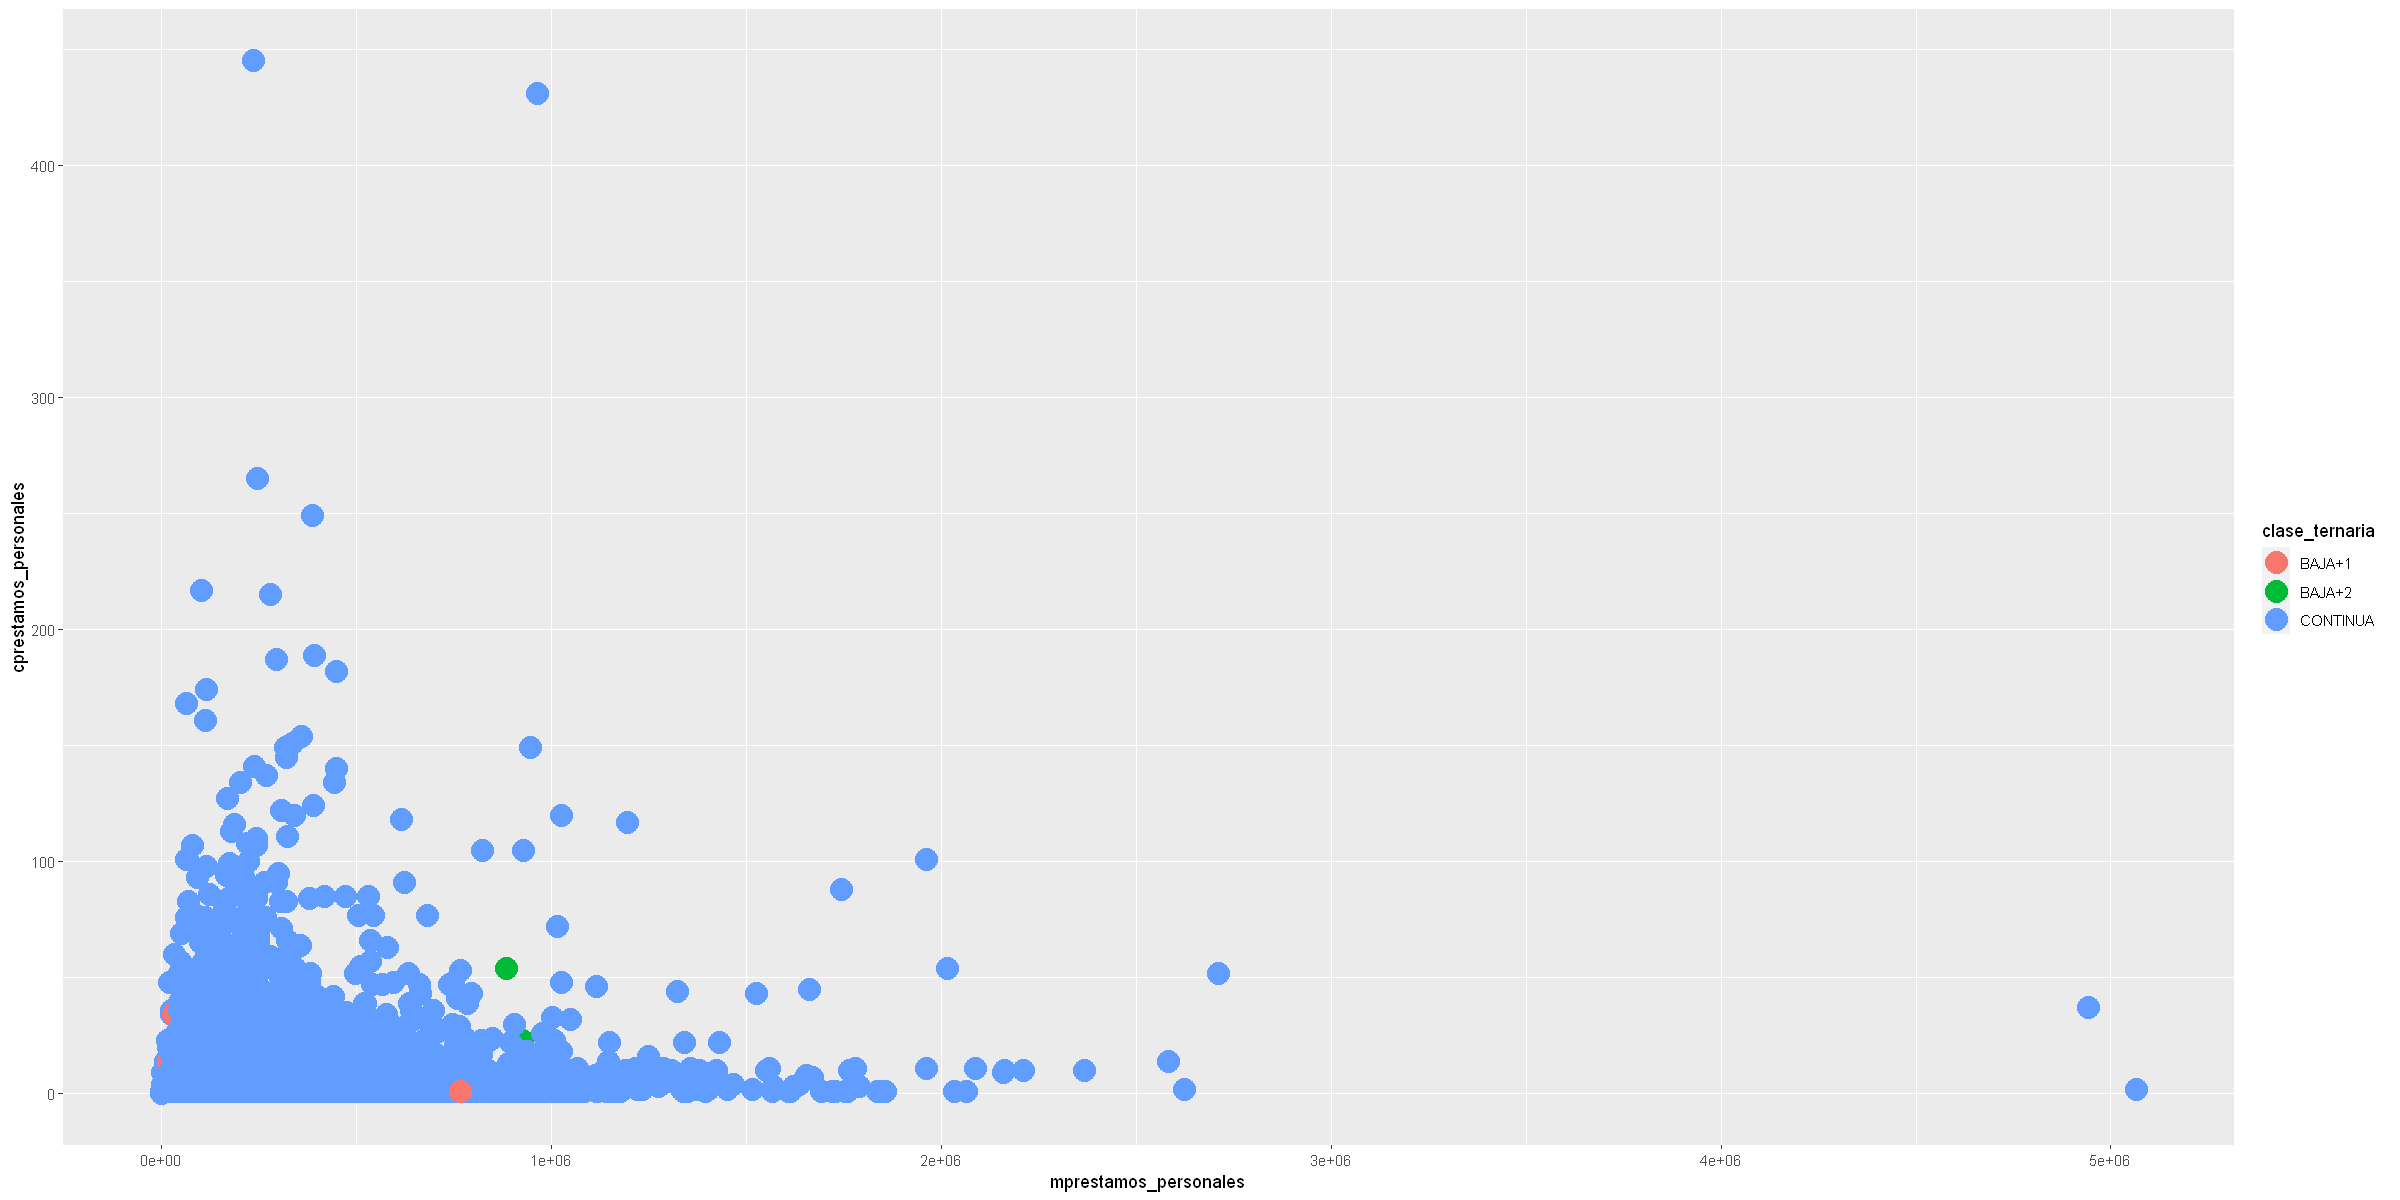

In [95]:
ggplot(dataset, aes(x=mprestamos_personales, y=cprestamos_personales, color=clase_ternaria)) + 
    geom_point(size=6) 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



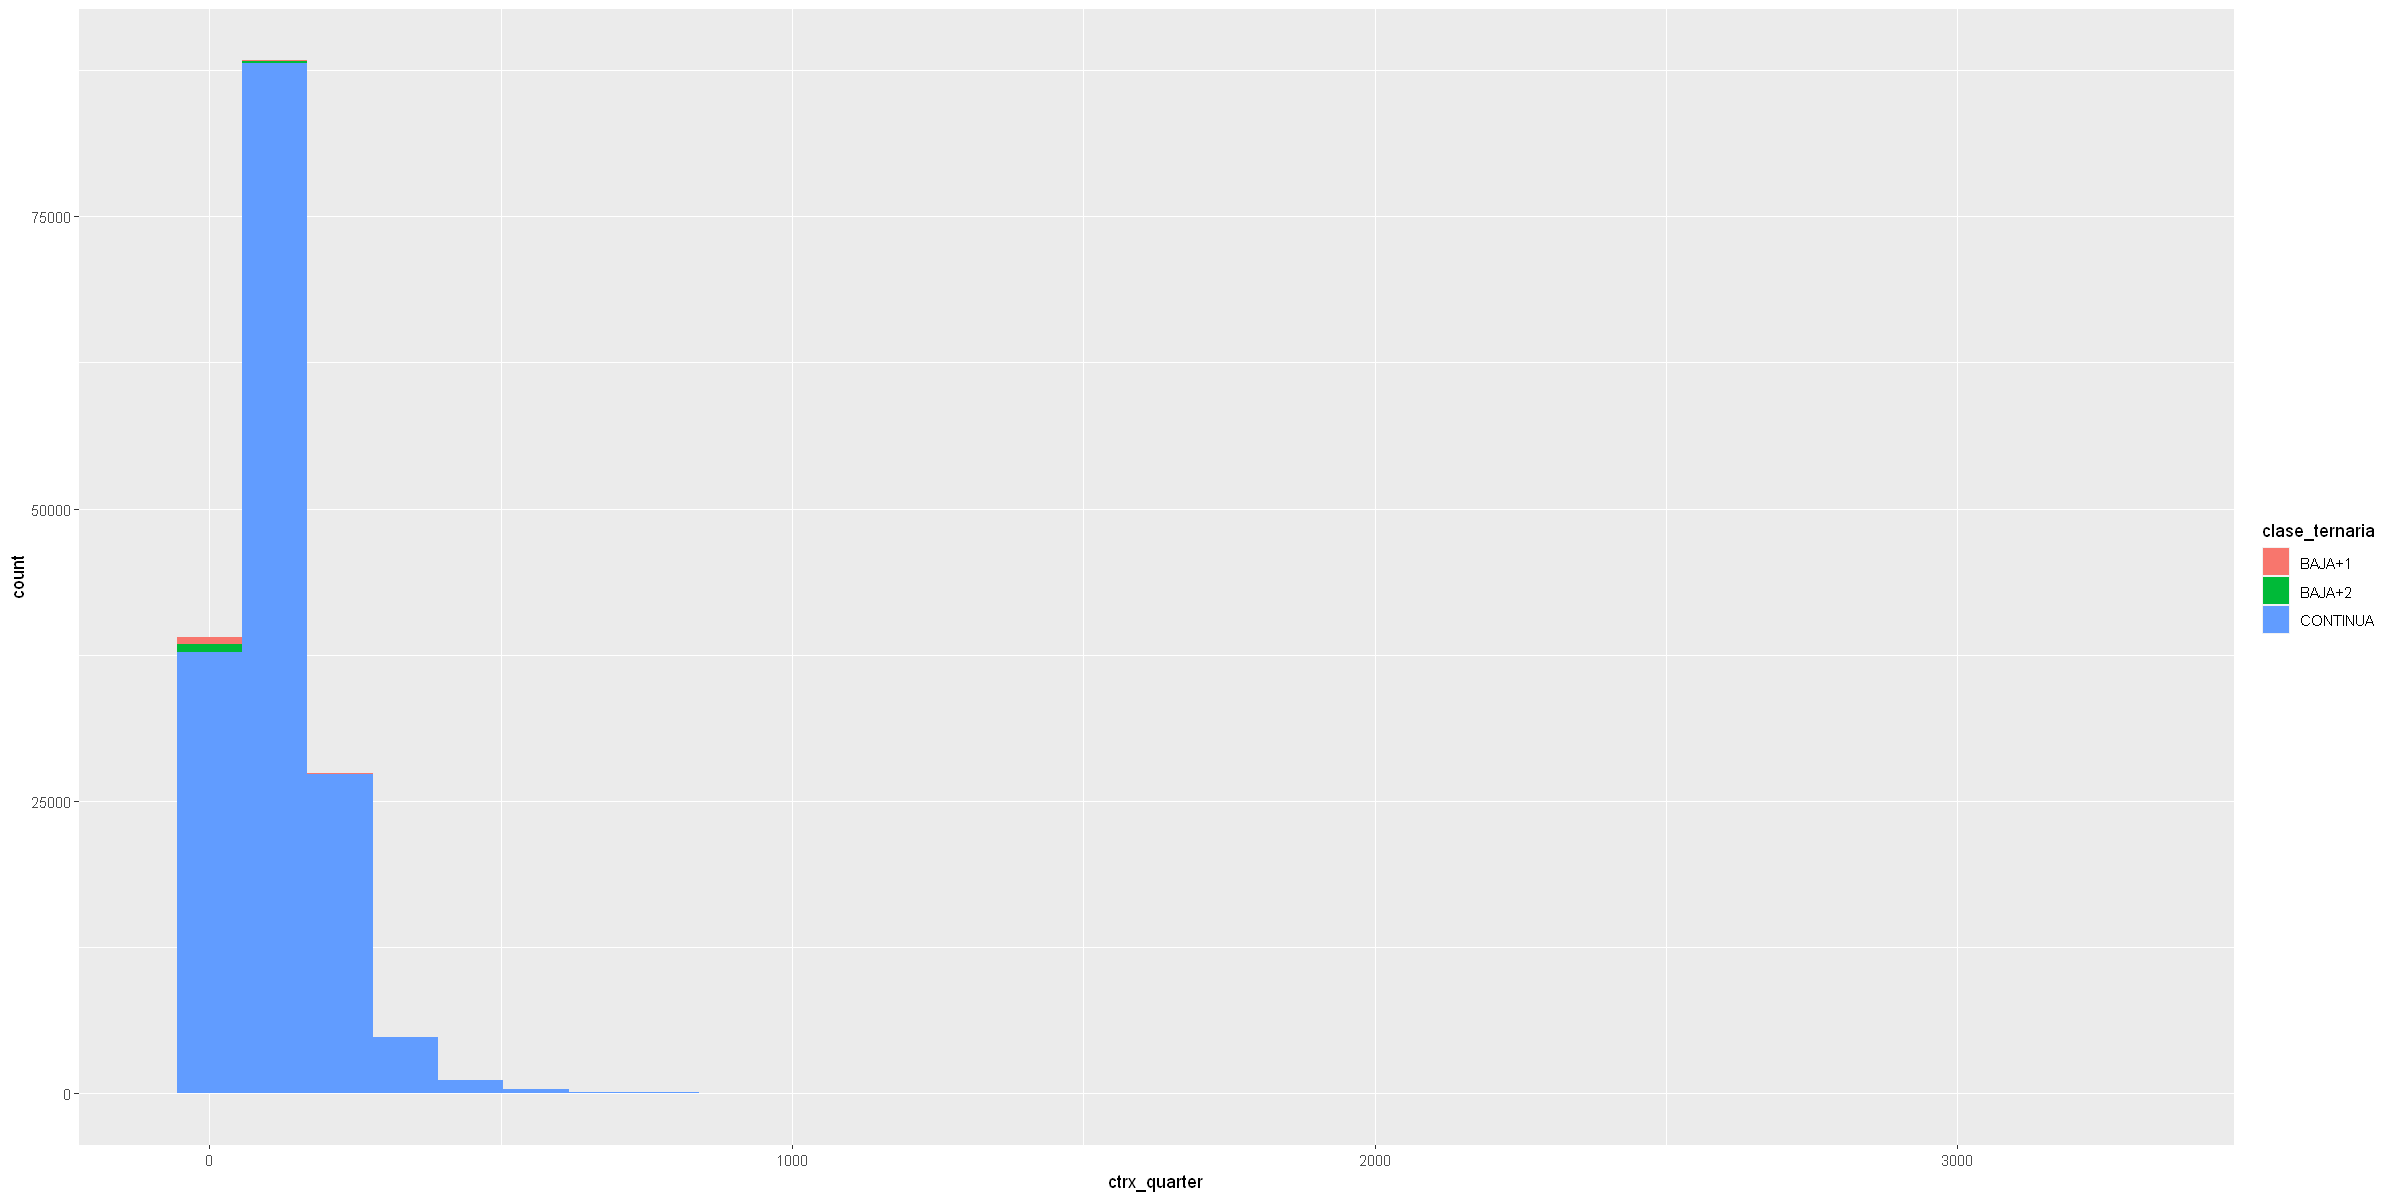

In [109]:
# Change histogram plot line colors by groups
ggplot(dataset, aes(x=ctrx_quarter, fill=clase_ternaria)) +
  geom_histogram() 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



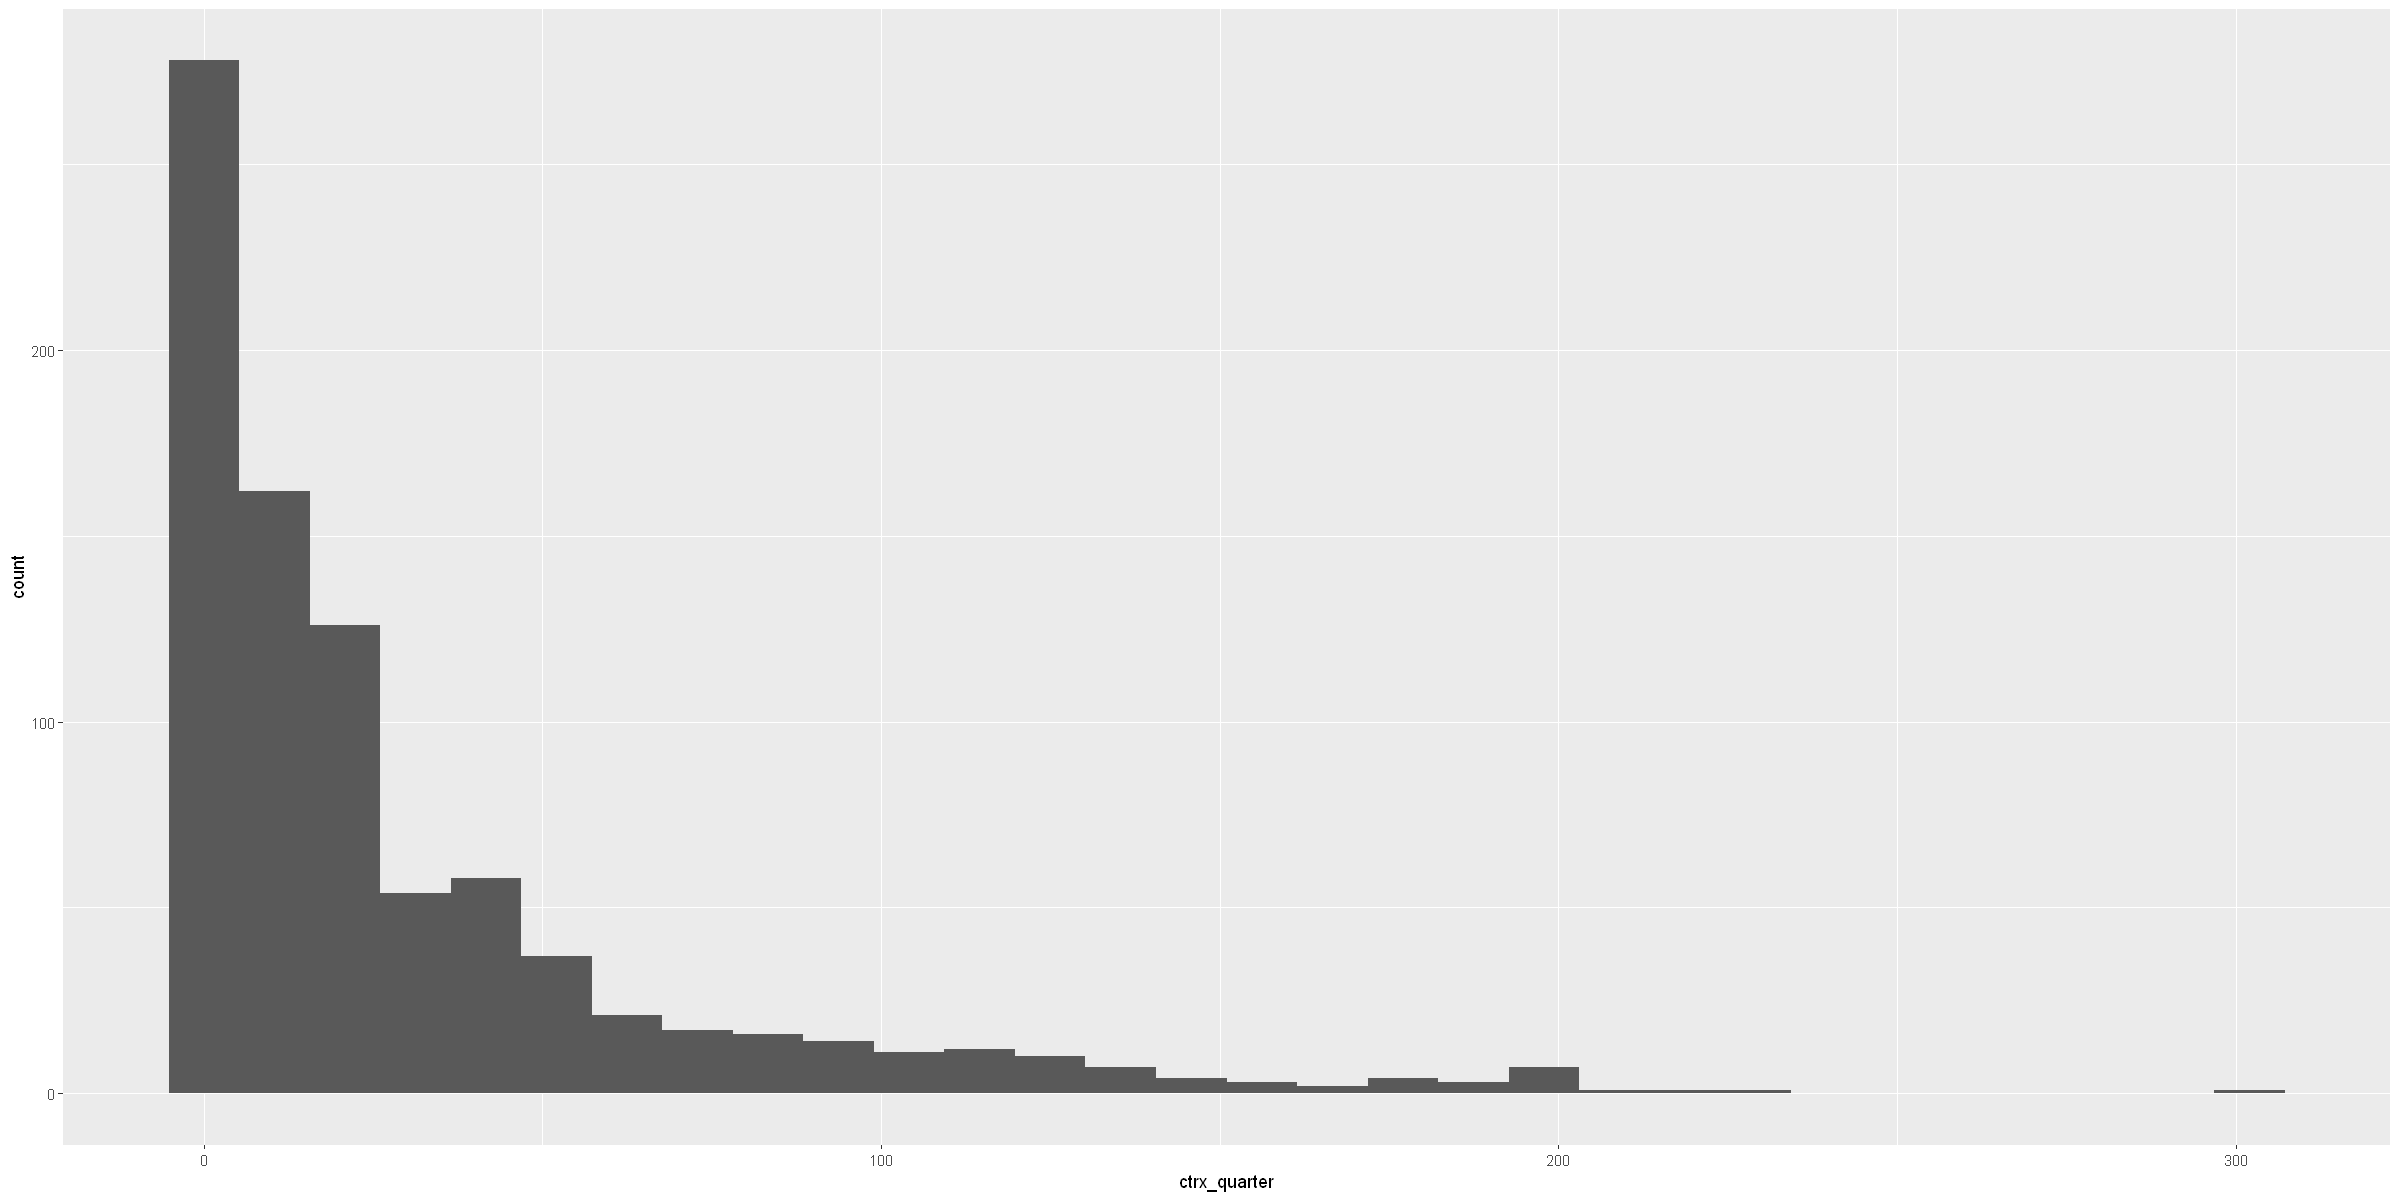

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



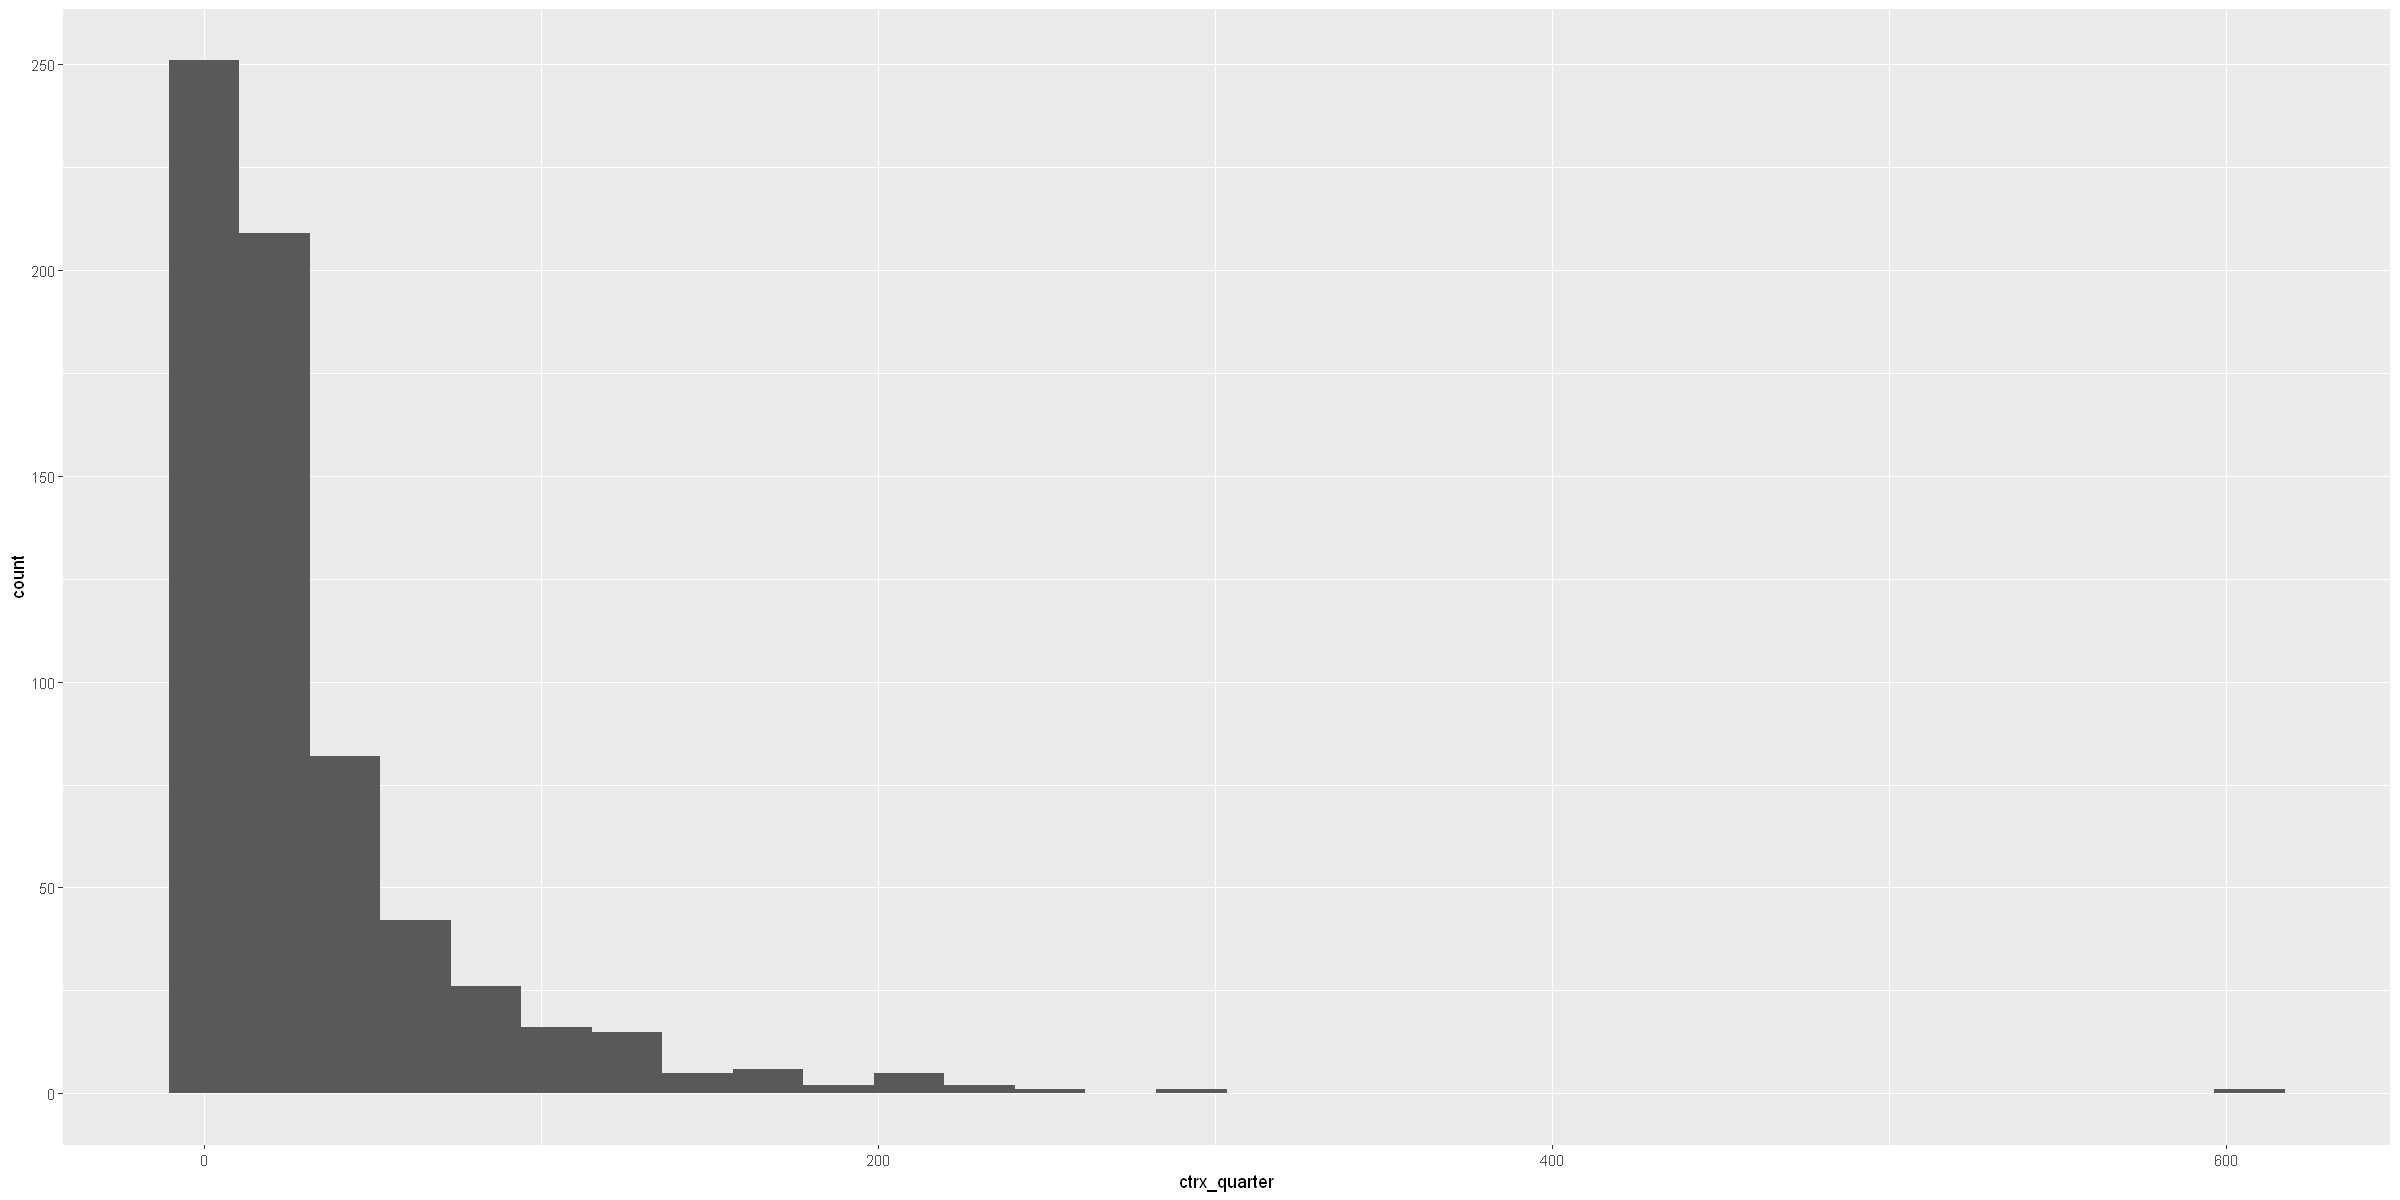

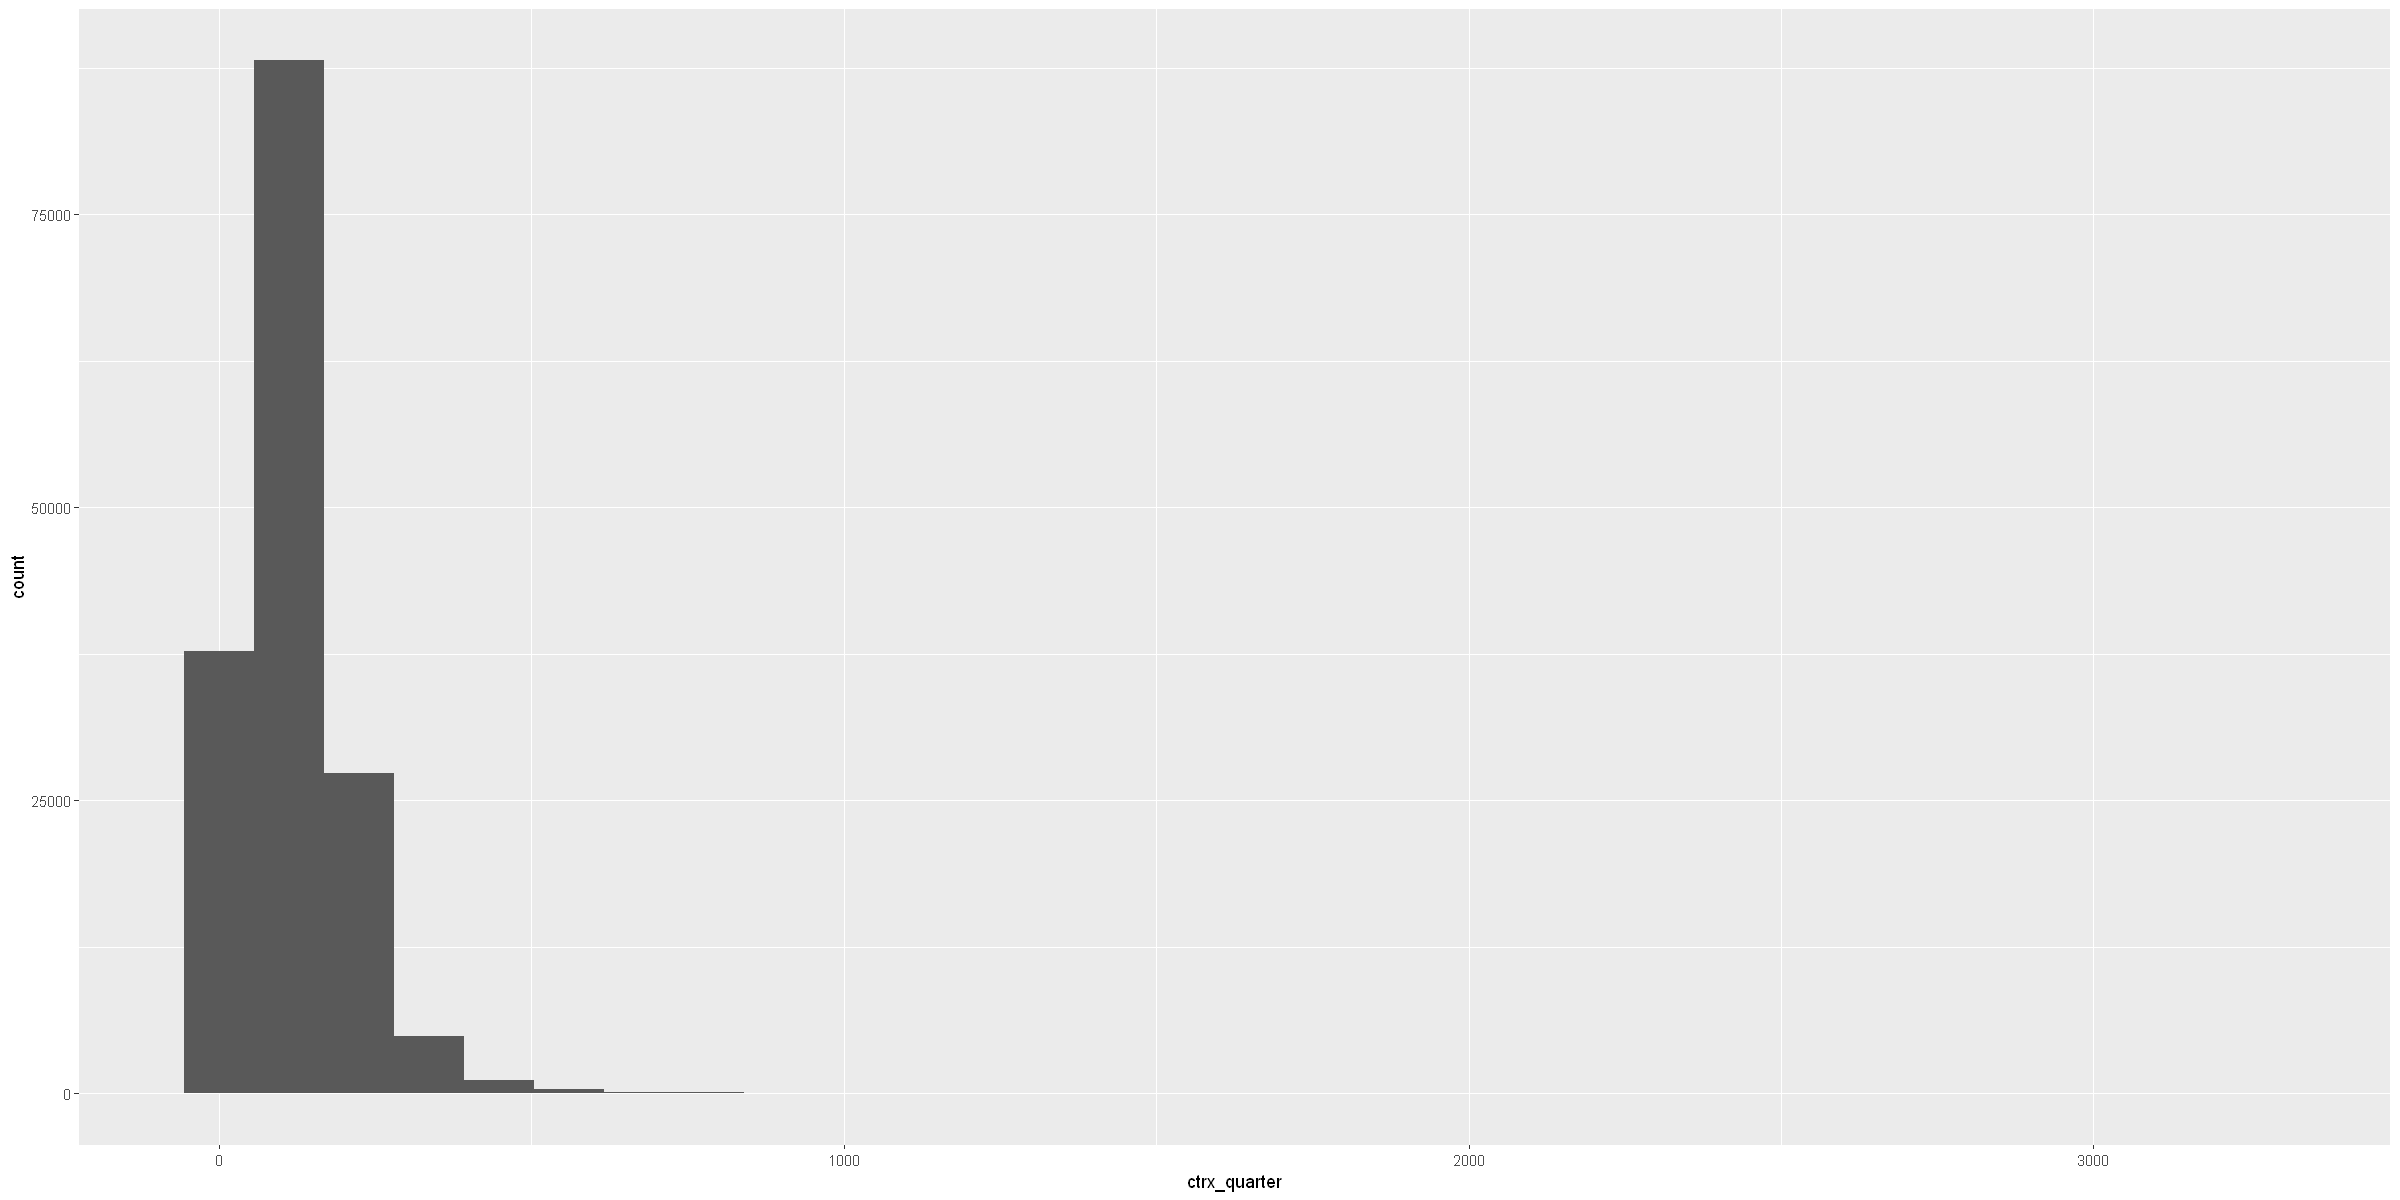

In [114]:
df_baja2 <- dataset[ clase_ternaria=='BAJA+2' ]
ggplot(df_baja2, aes(x=ctrx_quarter)) +
  geom_histogram() 

df_baja1 <- dataset[ clase_ternaria=='BAJA+1' ]
ggplot(df_baja1, aes(x=ctrx_quarter)) +
  geom_histogram() 

df_cont <- dataset[ clase_ternaria=='CONTINUA' ]
ggplot(df_cont, aes(x=ctrx_quarter)) +
  geom_histogram() 

## Modelo train-test

In [7]:
GananciaArbol  <-  function( semilla, data, x, train=0.70) {
  #establezco la semilla
  set.seed(semilla)
  train_rows <- createDataPartition(dataset$clase_ternaria, p= 0.70,list= FALSE)
  
  modelo <-  rpart::rpart(formula= "clase_ternaria ~ ." ,
                          data= data[ train_rows],  #los datos de training
                          xval= 0,
                          control= x)
  
  feature_imp <- head(as.data.frame(modelo$variable.importance), 20)
  print(feature_imp)  
  
  #Aplico el modelo a los datos de testing  
  prediccion  <- predict( modelo, data[ -train_rows], type = "prob")
  
  prob_baja2  <- prediccion[, "BAJA+2"]
  ganancia_testing <- data[ -train_rows, sum(  (prob_baja2> 0.025) * ifelse( clase_ternaria=="BAJA+2", 78000, -2000) )]

  #normalizo la ganancia
  ganancia_testing_normalizada  <- ganancia_testing/0.3  

  return( ganancia_testing_normalizada )
}

In [8]:
dataset <- fread("./datasets/competencia1_2022.csv")   #cargo el dataset #cargo el dataset
dataset <- dataset[ foto_mes==202101 ]  # me quedo solo con el periodo 202101

In [9]:
dataset[ , feat1 := (mcuentas_saldo/cdescubierto_preacordado)]

dataset[ , mcuenta_corriente := (mcuenta_corriente_adicional + mcuenta_corriente)]
dataset[ , mcaja_ahorro := (mcaja_ahorro + mcaja_ahorro_adicional)]
dataset[ , mtarjetas_consumo := (mtarjeta_visa_consumo + mtarjeta_master_consumo)]
dataset[ , ctarjetas_transacciones := (ctarjeta_visa_transacciones + ctarjeta_master_transacciones)]
dataset[ , ctarjetas := (ctarjeta_visa + ctarjeta_master)]
dataset[ , cprestamos := (cprestamos_personales + cprestamos_prendarios + cprestamos_hipotecarios)]
dataset[ , mprestamos := (mprestamos_personales + mprestamos_prendarios + mprestamos_hipotecarios)]
dataset[ , cinversion := (cinversion1 + cinversion2)]
dataset[ , minversion := (minversion1_pesos + minversion1_dolares  + minversion2)]
dataset[ , cseguro := (cseguro_auto + cseguro_vivienda + cseguro_vida + cseguro_accidentes_personales)]
dataset[ , cpayroll_trx := (cpayroll_trx + cpayroll2_trx)]
dataset[ , mpayroll := (mpayroll + mpayroll2)]
dataset[ , mdebitos_automaticos := (mcuenta_debitos_automaticos + mttarjeta_visa_debitos_automaticos + mttarjeta_master_debitos_automaticos)]
dataset[ , cdebitos_automaticos := (ccuenta_debitos_automaticos + ctarjeta_visa_debitos_automaticos + ctarjeta_master_debitos_automaticos)]
dataset[ , ccomisiones := (ccomisiones_mantenimiento + ccomisiones_otras)]
dataset[ , mcomisiones := (mcomisiones_mantenimiento + mcomisiones_otras)]
dataset[ , ctransferencias := (ctransferencias_recibidas - ctransferencias_emitidas - cextraccion_autoservicio + ccheques_depositados - ccheques_emitidos )]
dataset[ , mtransferencias := (mtransferencias_recibidas - mtransferencias_emitidas - mextraccion_autoservicio + mcheques_depositados - mcheques_emitidos )]

In [10]:
dataset[,cseguro_auto:=NULL]
dataset[,cseguro_vivienda:=NULL]
dataset[,cseguro_vida:=NULL]
dataset[,cseguro_accidentes_personales:=NULL]

#elimino por data drifting
dataset[,Visa_fultimo_cierre:=NULL]
dataset[,Master_fultimo_cierre:=NULL]

In [11]:
dataset[,mcuentas_saldo:=NULL]
dataset[,cdescubierto_preacordado:=NULL]

dataset[,mcuenta_corriente_adicional:=NULL]
dataset[,mcaja_ahorro_adicional:=NULL]
dataset[,mtarjeta_visa_consumo:=NULL]
dataset[,mtarjeta_master_consumo:=NULL]
dataset[,ctarjeta_visa_transacciones:=NULL]
dataset[,ctarjeta_master_transacciones:=NULL]
dataset[,ctarjeta_visa:=NULL]
dataset[,ctarjeta_master:=NULL]
dataset[,cprestamos_personales:=NULL]
dataset[,cprestamos_prendarios:=NULL]
dataset[,cprestamos_hipotecarios:=NULL]
dataset[,mprestamos_personales:=NULL]
dataset[,mprestamos_prendarios:=NULL]
dataset[,mprestamos_hipotecarios:=NULL]
dataset[,cinversion1 :=NULL]
dataset[,cinversion2 :=NULL]
dataset[,minversion1_pesos:=NULL]
dataset[,minversion1_dolares:=NULL]
dataset[,minversion2:=NULL]
dataset[,cpayroll2_trx:=NULL]
dataset[,mpayroll2:=NULL]
dataset[,mcuenta_debitos_automaticos:=NULL]
dataset[,mttarjeta_visa_debitos_automaticos:=NULL]
dataset[,mttarjeta_master_debitos_automaticos:=NULL]
dataset[,ccuenta_debitos_automaticos:=NULL]
dataset[,ctarjeta_visa_debitos_automaticos:=NULL]
dataset[,ctarjeta_master_debitos_automaticos:=NULL]
dataset[,ccomisiones_mantenimiento:=NULL]
dataset[,ccomisiones_otras:=NULL]
dataset[,mcomisiones_mantenimiento:=NULL]
dataset[,mcomisiones_otras:=NULL]
dataset[,ctransferencias_recibidas:=NULL]
dataset[,ctransferencias_emitidas:=NULL]
dataset[,cextraccion_autoservicio:=NULL]
dataset[,ccheques_depositados:=NULL]
dataset[,ccheques_emitidos:=NULL]
dataset[,mtransferencias_recibidas:=NULL]
dataset[,mtransferencias_emitidas:=NULL]
dataset[,mextraccion_autoservicio:=NULL]
dataset[,mcheques_depositados:=NULL]
dataset[,mcheques_emitidos:=NULL]

#dataset[,:=NULL]

In [12]:
nrow( dataset )
ncol( dataset )

[1] 161342

[1] 120

In [13]:
colnames( dataset )

[1] "numero_de_cliente"               "foto_mes"                       
  [3] "active_quarter"                  "cliente_vip"                    
  [5] "internet"                        "cliente_edad"                   
  [7] "cliente_antiguedad"              "mrentabilidad"                  
  [9] "mrentabilidad_annual"            "mcomisiones"                    
 [11] "mactivos_margen"                 "mpasivos_margen"                
 [13] "cproductos"                      "tcuentas"                       
 [15] "ccuenta_corriente"               "mcuenta_corriente"              
 [17] "ccaja_ahorro"                    "mcaja_ahorro"                   
 [19] "mcaja_ahorro_dolares"            "ctarjeta_debito"                
 [21] "ctarjeta_debito_transacciones"   "mautoservicio"                  
 [23] "cplazo_fijo"                     "mplazo_fijo_dolares"            
 [25] "mplazo_fijo_pesos"               "ccaja_seguridad"                
 [27] "cpayroll_trx"                    "mpayroll"                       
 [29] "cpagodeservicios"                "mpagodeservicios"               
 [31] "cpagomiscuentas"                 "mpagomiscuentas"                
 [33] "ccajeros_propios_descuentos"     "mcajeros_propios_descuentos"    
 [35] "ctarjeta_visa_descuentos"        "mtarjeta_visa_descuentos"       
 [37] "ctarjeta_master_descuentos"      "mtarjeta_master_descuentos"     
 [39] "cforex"                          "cforex_buy"                     
 [41] "mforex_buy"                      "cforex_sell"                    
 [43] "mforex_sell"                     "ccheques_depositados_rechazados"
 [45] "mcheques_depositados_rechazados" "ccheques_emitidos_rechazados"   
 [47] "mcheques_emitidos_rechazados"    "tcallcenter"                    
 [49] "ccallcenter_transacciones"       "thomebanking"                   
 [51] "chomebanking_transacciones"      "ccajas_transacciones"           
 [53] "ccajas_consultas"                "ccajas_depositos"               
 [55] "ccajas_extracciones"             "ccajas_otras"                   
 [57] "catm_trx"                        "matm"                           
 [59] "catm_trx_other"                  "matm_other"                     
 [61] "ctrx_quarter"                    "tmobile_app"                    
 [63] "cmobile_app_trx"                 "Master_delinquency"             
 [65] "Master_status"                   "Master_mfinanciacion_limite"    
 [67] "Master_Fvencimiento"             "Master_Finiciomora"             
 [69] "Master_msaldototal"              "Master_msaldopesos"             
 [71] "Master_msaldodolares"            "Master_mconsumospesos"          
 [73] "Master_mconsumosdolares"         "Master_mlimitecompra"           
 [75] "Master_madelantopesos"           "Master_madelantodolares"        
 [77] "Master_mpagado"                  "Master_mpagospesos"             
 [79] "Master_mpagosdolares"            "Master_fechaalta"               
 [81] "Master_mconsumototal"            "Master_cconsumos"               
 [83] "Master_cadelantosefectivo"       "Master_mpagominimo"             
 [85] "Visa_delinquency"                "Visa_status"                    
 [87] "Visa_mfinanciacion_limite"       "Visa_Fvencimiento"              
 [89] "Visa_Finiciomora"                "Visa_msaldototal"               
 [91] "Visa_msaldopesos"                "Visa_msaldodolares"             
 [93] "Visa_mconsumospesos"             "Visa_mconsumosdolares"          
 [95] "Visa_mlimitecompra"              "Visa_madelantopesos"            
 [97] "Visa_madelantodolares"           "Visa_mpagado"                   
 [99] "Visa_mpagospesos"                "Visa_mpagosdolares"             
[101] "Visa_fechaalta"                  "Visa_mconsumototal"             
[103] "Visa_cconsumos"                  "Visa_cadelantosefectivo"        
[105] "Visa_mpagominimo"                "clase_ternaria"                 
[107] "feat1"                           "mtarjetas_consumo"              
[109] 

In [14]:
#defino unos buenos hiperparametros
param  <- list("cp"= -0.137, 
               "minsplit"=  1683,
               "minbucket"= 264,
               "maxdepth"= 18 )

In [15]:
ksemillas  <- c(124739, 954011, 657863, 761213, 857957)

In [16]:
vector_ganancias  <- c()  #vector donde voy a ir acumulando las ganancias

In [17]:
for( semilla in ksemillas)
{
    ganancia  <- GananciaArbol( semilla, dataset, x=param, train=0.70 )
    vector_ganancias  <- c( vector_ganancias, ganancia)
}

                        modelo$variable.importance
ctrx_quarter                             60.649556
mpasivos_margen                          21.434005
ccomisiones                              17.277104
active_quarter                           15.938349
mprestamos                               12.719536
cprestamos                               11.596100
mcaja_ahorro                             10.482620
mcomisiones                              10.068843
mrentabilidad                             8.957679
mcuenta_corriente                         7.240111
mactivos_margen                           6.916179
ctarjetas                                 6.416608
mrentabilidad_annual                      6.299119
mpayroll                                  4.547420
cpayroll_trx                              4.325094
mtarjetas_consumo                         3.839328
tcuentas                                  3.075800
cproductos                                2.873267
ctarjetas_transacciones        

In [18]:
vector_ganancias

[1] 19566667 22853333 19446667 19013333 18760000

In [19]:
mean( vector_ganancias )

[1] 19928000

## Predicción para Kaggle

In [20]:
dataset <- fread("./datasets/competencia1_2022.csv")  

In [21]:
dataset[ , feat1 := (mcuentas_saldo/cdescubierto_preacordado)]

dataset[ , mcuenta_corriente := (mcuenta_corriente_adicional + mcuenta_corriente)]
dataset[ , mcaja_ahorro := (mcaja_ahorro + mcaja_ahorro_adicional)]
dataset[ , mtarjetas_consumo := (mtarjeta_visa_consumo + mtarjeta_master_consumo)]
dataset[ , ctarjetas_transacciones := (ctarjeta_visa_transacciones + ctarjeta_master_transacciones)]
dataset[ , ctarjetas := (ctarjeta_visa + ctarjeta_master)]
dataset[ , cprestamos := (cprestamos_personales + cprestamos_prendarios + cprestamos_hipotecarios)]
dataset[ , mprestamos := (mprestamos_personales + mprestamos_prendarios + mprestamos_hipotecarios)]
dataset[ , cinversion := (cinversion1 + cinversion2)]
dataset[ , minversion := (minversion1_pesos + minversion1_dolares  + minversion2)]
dataset[ , cseguro := (cseguro_auto + cseguro_vivienda + cseguro_vida + cseguro_accidentes_personales)]
dataset[ , cpayroll_trx := (cpayroll_trx + cpayroll2_trx)]
dataset[ , mpayroll := (mpayroll + mpayroll2)]
dataset[ , mdebitos_automaticos := (mcuenta_debitos_automaticos + mttarjeta_visa_debitos_automaticos + mttarjeta_master_debitos_automaticos)]
dataset[ , cdebitos_automaticos := (ccuenta_debitos_automaticos + ctarjeta_visa_debitos_automaticos + ctarjeta_master_debitos_automaticos)]
dataset[ , ccomisiones := (ccomisiones_mantenimiento + ccomisiones_otras)]
dataset[ , mcomisiones := (mcomisiones_mantenimiento + mcomisiones_otras)]
dataset[ , ctransferencias := (ctransferencias_recibidas - ctransferencias_emitidas - cextraccion_autoservicio + ccheques_depositados - ccheques_emitidos )]
dataset[ , mtransferencias := (mtransferencias_recibidas - mtransferencias_emitidas - mextraccion_autoservicio + mcheques_depositados - mcheques_emitidos )]

In [22]:
dataset[,cseguro_auto:=NULL]
dataset[,cseguro_vivienda:=NULL]
dataset[,cseguro_vida:=NULL]
dataset[,cseguro_accidentes_personales:=NULL]

#elimino por data drifting
dataset[,Visa_fultimo_cierre:=NULL]
dataset[,Master_fultimo_cierre:=NULL]

In [23]:
dataset[,mcuentas_saldo:=NULL]
dataset[,cdescubierto_preacordado:=NULL]

dataset[,mcuenta_corriente_adicional:=NULL]
dataset[,mcaja_ahorro_adicional:=NULL]
dataset[,mtarjeta_visa_consumo:=NULL]
dataset[,mtarjeta_master_consumo:=NULL]
dataset[,ctarjeta_visa_transacciones:=NULL]
dataset[,ctarjeta_master_transacciones:=NULL]
dataset[,ctarjeta_visa:=NULL]
dataset[,ctarjeta_master:=NULL]
dataset[,cprestamos_personales:=NULL]
dataset[,cprestamos_prendarios:=NULL]
dataset[,cprestamos_hipotecarios:=NULL]
dataset[,mprestamos_personales:=NULL]
dataset[,mprestamos_prendarios:=NULL]
dataset[,mprestamos_hipotecarios:=NULL]
dataset[,cinversion1 :=NULL]
dataset[,cinversion2 :=NULL]
dataset[,minversion1_pesos:=NULL]
dataset[,minversion1_dolares:=NULL]
dataset[,minversion2:=NULL]
dataset[,cpayroll2_trx:=NULL]
dataset[,mpayroll2:=NULL]
dataset[,mcuenta_debitos_automaticos:=NULL]
dataset[,mttarjeta_visa_debitos_automaticos:=NULL]
dataset[,mttarjeta_master_debitos_automaticos:=NULL]
dataset[,ccuenta_debitos_automaticos:=NULL]
dataset[,ctarjeta_visa_debitos_automaticos:=NULL]
dataset[,ctarjeta_master_debitos_automaticos:=NULL]
dataset[,ccomisiones_mantenimiento:=NULL]
dataset[,ccomisiones_otras:=NULL]
dataset[,mcomisiones_mantenimiento:=NULL]
dataset[,mcomisiones_otras:=NULL]
dataset[,ctransferencias_recibidas:=NULL]
dataset[,ctransferencias_emitidas:=NULL]
dataset[,cextraccion_autoservicio:=NULL]
dataset[,ccheques_depositados:=NULL]
dataset[,ccheques_emitidos:=NULL]
dataset[,mtransferencias_recibidas:=NULL]
dataset[,mtransferencias_emitidas:=NULL]
dataset[,mextraccion_autoservicio:=NULL]
dataset[,mcheques_depositados:=NULL]
dataset[,mcheques_emitidos:=NULL]

#dataset[,:=NULL]

In [24]:
nrow( dataset )
ncol( dataset )

[1] 324242

[1] 120

In [25]:
dtrain  <- dataset[ foto_mes==202101 ]  #defino donde voy a entrenar
dapply  <- dataset[ foto_mes==202103 ]  #defino donde voy a aplicar el modelo

In [26]:
#set.seed(954011)
modelo  <- rpart(formula=    "clase_ternaria ~ .", #quiero predecir clase_ternaria a partir de el resto de las variables
                 data =      dtrain,  #los datos donde voy a entrenar
                 xval=       0,
                 control = param)  

In [27]:
feature_imp <- head(as.data.frame(modelo$variable.importance), 20)
print(feature_imp)  

                        modelo$variable.importance
ctrx_quarter                             93.233624
active_quarter                           24.698409
ccomisiones                              23.945486
mcuenta_corriente                        21.376848
mactivos_margen                          19.052068
mcaja_ahorro                             16.957444
cprestamos                               16.499856
mprestamos                               14.997683
mpasivos_margen                          13.899534
feat1                                    13.185816
ctarjetas                                10.035952
mtarjetas_consumo                         9.966659
mcomisiones                               9.019108
ctarjetas_transacciones                   7.269999
cliente_antiguedad                        5.941108
cproductos                                5.245146
Master_fechaalta                          4.964432
Visa_msaldopesos                          4.848146
Visa_msaldototal               

In [28]:
prediccion  <- predict( modelo, dapply , type = "prob") #aplico el modelo

In [29]:
dapply[ , prob_baja2 := prediccion[, "BAJA+2"] ]

In [30]:
dapply[ , Predicted  := as.numeric(prob_baja2 > 1/40) ]

In [31]:
dir.create( "./exp/competencia_1_claseTernaria" ) 

Warning message in dir.create("./exp/resignacion"):
"'.\exp\resignacion' already exists"


In [32]:
fwrite( dapply[ , list(numero_de_cliente, Predicted) ], #solo los campos para Kaggle
        file= "./exp/competencia_1_claseTernaria/v8_.csv", 
        sep= "," )